## Kaggle Competition
### Facebook Recruiting IV: Human or Robot?

### AutoML implementation usingH2O.ai

In [0]:
import h2o

In [0]:
from collections import defaultdict
import os
import time
import numpy as np

import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
# from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, \
    GradientBoostingClassifier, \
    BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
# import graphlab as gl
import xgboost as xgb

In [0]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [0]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [0]:
h2o.init(strict_version_check=False,max_mem_size=min_mem_size)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7ycx8tyb
  JVM stdout: /tmp/tmp7ycx8tyb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7ycx8tyb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_unknownUser_fo0cc9
H2O cluster total nodes:,1
H2O cluster free memory:,6 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


## Initialize google drive in your google colaboratory

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 5.6MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'1Uq8mxk7V7DR5-1zhfRXKU36DdsID-V1D' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

title: final_result.csv, id: 1-4IOgbFPUztXbEHGpKU3uoIFUz5HGYpF
title: H2O_result.csv, id: 1rArFf_norU08JD8GLFP2j67qF-2sXzFb
title: test_full.csv, id: 1YGIwJEOqSZfWRFVDbTgxmcr2H_85ZvV2
title: train_full.csv, id: 1thevO9_YeXxIHepH74Yx8a8gEBEghH6P
title: bids.csv, id: 1ZGBx4uqRVrkbaVzLiQGOk6BsNClms1Ds
title: bids_auc.csv, id: 1IjPBzKBDfUsqm3Qcd6J5QlWfg_haD2Yy
title: Assignment 2.ipynb, id: 108dIhwRphKUZEXMYqNPL8OT80RwqX6m_
title: train.csv, id: 1REHRZZIFlEHCknb5rTBQLpgpoNKDVmnu
title: result.csv, id: 1QgGQSM5zbb0WZZ0i8KQCadZI5P1Kx1Sd
title: prediction_result, id: 1R_pBTw1MGqWzf6nl7Qh9MIJapPWyFNtK
title: result_new.csv, id: 1CzZs9fFpLzsizxZyKOlKOUfzjaHLFzVg
title: test.csv, id: 1IZSPioHe1-_l1c4rTHBKVBQDzn2XPJZs
title: .DS_Store, id: 1xYQA2blLhevuDFBehMtl3IGc9OJ7pAYD
title: Rushter.ipynb, id: 1-V7gLYeMxw0xetl5PUz7E_K0A5fSHlJM
title: prediction_result.csv, id: 1PmQfE85WT7bgYvTH3vHNh6-wSSs6pigL
title: tdiff.csv, id: 1Hjvqu_YzkuZD1nAtajpzSTngU9PpJPJ6
title: sampleSubmission.csv, id: 1-E7mW8Q-T

### To access your files use the specific ids

In [0]:
train_downloaded = drive.CreateFile({'id': '1thevO9_YeXxIHepH74Yx8a8gEBEghH6P'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': '1YGIwJEOqSZfWRFVDbTgxmcr2H_85ZvV2'})
test_downloaded.GetContentFile('test.csv')

In [0]:
import pandas as pd
import numpy as np
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')
copy_test=pd.read_csv('test.csv')

In [0]:
y = 'outcome'

In [0]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals= [], []
    for key, val in df.dtypes.items():
        if key in C:
            if val == 'int':
                ints.append(key)           
            else: 
                reals.append(key)    
    x=ints+reals
    return x

### Loading the data into H2O dataframe

In [0]:
hf = h2o.H2OFrame(Train)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


**Defining the model configurations**

In [0]:
run_time=500
run_id='SOME_ID_20180617_221529' # Just some arbitrary ID
server_path='/Users/bear/Documents/INFO_7390/H2O'
classification=True
scale=False
max_models=None
balance_y=False # balance_classes=balance_y
balance_threshold=0.2
project ="automl_test"  # project_name = project

In [0]:
# import h2o package and specific estimator 
import h2o
from h2o.automl import H2OAutoML

In [0]:
# automl
# runs for run_time seconds then builds a stacked ensemble
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project,balance_classes=balance_y)

In [0]:
aml.train(x=X,
          y=y,
          training_frame=hf)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

### After training the h20 on the entire dataset we get list of models performing well on that dataset. For this specific case gradient boosting machine is perfoming best.

In [0]:
best_model.algo

'gbm'

### Leaderboard

In [0]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_4_AutoML_20190226_211101,0.0371448,0.19273,0.0371448,0.0763629,0.136401
StackedEnsemble_BestOfFamily_AutoML_20190226_211101,0.0371521,0.192749,0.0371521,0.0769925,0.135639
StackedEnsemble_AllModels_AutoML_20190226_211101,0.0372378,0.192971,0.0372378,0.0807891,0.136267
XGBoost_3_AutoML_20190226_211101,0.0375777,0.19385,0.0375777,0.0931008,0.138708
XGBoost_grid_1_AutoML_20190227_000758_model_1,0.037643,0.194018,0.037643,0.0799229,0.137712
GBM_3_AutoML_20190227_000758,0.0376717,0.194092,0.0376717,0.0758902,0.136904
GBM_3_AutoML_20190226_211101,0.0378302,0.1945,0.0378302,0.0774384,0.138104
XGBoost_1_AutoML_20190227_000758,0.0379486,0.194804,0.0379486,0.0776,0.137873
GBM_5_AutoML_20190226_211101,0.0383223,0.195761,0.0383223,0.0835725,0.136342
GBM_2_AutoML_20190226_211101,0.0383894,0.195932,0.0383894,0.0769346,0.138622


In [0]:
gbm_train, gbm_test= hf.split_frame([0.7],seed=12345)

### Importing the Gradient boosting classifier and training the model using H2O autoML

In [0]:
from h2o.estimators import H2OGradientBoostingEstimator
gbm_model = H2OGradientBoostingEstimator(model_id = "gbm_default.hex")
gbm_model.train(x = X, y = y, training_frame = hf, validation_frame = gbm_test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
predict_values= pd.DataFrame()
predict_values['bidder_id'] = Test['bidder_id']
labels = ['payment_account', 'address', 'bidder_id']
Test.drop(labels=labels, axis=1, inplace=True)
hf_test = h2o.H2OFrame(Test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
predict_values.head()

,bidder_id
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7
1,a921612b85a1494456e74c09393ccb65ylp4y
2,6b601e72a4d264dab9ace9d7b229b47479v6i
3,eaf0ed0afc9689779417274b4791726cn5udi
4,cdecd8d02ed8c6037e38042c7745f688mx5sf


In [0]:
predictions = np.zeros([len(hf_test), 1], np.float)
predictions = gbm_model.predict(hf_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [0]:
predictions

predict
-0.00351823
0.000574068
0.000822422
0.0677966
0.000520014
0.058997
0.000520014
0.000881717
0.0112079
0.0656245


### The bidder id and predictions are clubbed in one dataframe and then exported to .csv file for final evaluation.

In [0]:
hf_predict_values.head()

bidder_id,prediction
49bb5a3c944b8fc337981cc7a9ccae41u31d7,-0.00351823
a921612b85a1494456e74c09393ccb65ylp4y,0.000574068
6b601e72a4d264dab9ace9d7b229b47479v6i,0.000822422
eaf0ed0afc9689779417274b4791726cn5udi,0.0677966
cdecd8d02ed8c6037e38042c7745f688mx5sf,0.000520014
d4aed439bdc854a56fc6cc3bdb986775w7hxw,0.058997
ed591299b162a19ff77f0479495831b31hl1q,0.000520014
eebdee08b0f67283126ef60307f49680sb9va,0.000881717
6887f0abc4eb4c79eb0e23c48ceea186vjfih,0.0112079
37eb6e2979e66d4ce29a74ac1c8bc6a5lqs6t,0.0656245


In [0]:
hf_predict_values = h2o.H2OFrame(predict_values)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
hf_predict_values['prediction']= predictions[:, 0]

In [0]:
hf_predict_values=hf_predict_values.drop(1)

### Sumbission File Header

In [0]:
hf_predict_values.head()

bidder_id,prediction
49bb5a3c944b8fc337981cc7a9ccae41u31d7,-0.00351823
a921612b85a1494456e74c09393ccb65ylp4y,0.000574068
6b601e72a4d264dab9ace9d7b229b47479v6i,0.000822422
eaf0ed0afc9689779417274b4791726cn5udi,0.0677966
cdecd8d02ed8c6037e38042c7745f688mx5sf,0.000520014
d4aed439bdc854a56fc6cc3bdb986775w7hxw,0.058997
ed591299b162a19ff77f0479495831b31hl1q,0.000520014
eebdee08b0f67283126ef60307f49680sb9va,0.000881717
6887f0abc4eb4c79eb0e23c48ceea186vjfih,0.0112079
37eb6e2979e66d4ce29a74ac1c8bc6a5lqs6t,0.0656245


In [0]:
h2o.export_file(hf_predict_values,path = "/content/drive/My Drive/Assignment_2_Kaggle/H2O_result.csv", force=True, parts=1)

Export File progress: |███████████████████████████████████████████████████| 100%


In [0]:
sample_downloaded = drive.CreateFile({'id': '1-E7mW8Q-TCEBUxt1IxL2Ka32S6SmnzUM'})
sample_downloaded.GetContentFile('sampleSubmission.csv')

In [0]:
sub = pd.read_csv('sampleSubmission.csv')

In [0]:
h2o_downloaded = drive.CreateFile({'id': '1rArFf_norU08JD8GLFP2j67qF-2sXzFb'})
h2o_downloaded.GetContentFile('H2O_result.csv')

In [0]:
h2o_result = pd.read_csv('H2O_result.csv')

In [0]:
h2o_result.head()

,bidder_id,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,-0.003518
1,a921612b85a1494456e74c09393ccb65ylp4y,0.000574
2,6b601e72a4d264dab9ace9d7b229b47479v6i,0.000822
3,eaf0ed0afc9689779417274b4791726cn5udi,0.067797
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0.000520


In [0]:
sub = sub.merge(h2o_result, on='bidder_id', how='left')

In [0]:
sub.head()

,bidder_id,prediction_x,prediction_y
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,0.0,-0.003518
1,a921612b85a1494456e74c09393ccb65ylp4y,0.0,0.000574
2,6b601e72a4d264dab9ace9d7b229b47479v6i,0.0,0.000822
3,eaf0ed0afc9689779417274b4791726cn5udi,0.0,0.067797
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0.0,0.000520


### Dealing with null values

The sample sumbission file contains all the bids required to be classified. There are nearly 4700 bids in the submission file. However there are some missing values also which needs to be taken care of before submitting the file.
We are filling the all the null values with mean and converting it to csv format for submission.

In [0]:
sub.fillna(0.0511674, inplace=True)

In [0]:
sub.drop('prediction_x', 1, inplace=True)

In [0]:
sub.to_csv('/content/drive/My Drive/Assignment_2_Kaggle/final_result.csv', index=False, header=['bidder_id', 'prediction'])

## Conclusion:

We used H2O AutoML to find the best machine learning classification model. After passing the model to autoML it return the list of top few model which would be a good fit this problem. We selected the gradient boosting machine since it was the top model. We predicted the testing data using trained GBM. The prediction results were far away from top. The model was not performing well, the auc score model for prediction was ~0.90. The rank on private leaderboard was ~450. AutoML predicted accurately that the gradient boosting machine would perform better for this task however it could not perform well at actual prediction of result. 

## Contributions:

After feature engineering the dataset we ran through the H2O AutoML to find out which model gave the best AUC Score and after that we ran the top model from the AutoML leaderboard the GBM model to give an accuracy of ~90 placing us in the top 500 positions in the kaggle leaderboard.

## Citations:


The H2O code in the above program are referenced by the below H2O notebooks from NikBearBrown Professor's repository.

https://github.com/nikbearbrown/CSYE_7245/blob/master/H2O/H2O_automl_lending_club.ipynb\

https://github.com/nikbearbrown/CSYE_7245/blob/master/H2O/H2O_automl_model.ipynb

To import the dataset from the google drive to the H20 notebook in the google colab we used pydrive which was referred by us is the below link.

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92



## License :

Copyright (c) 2019 Johail Sherieff, Parag Bhingarkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Submission:

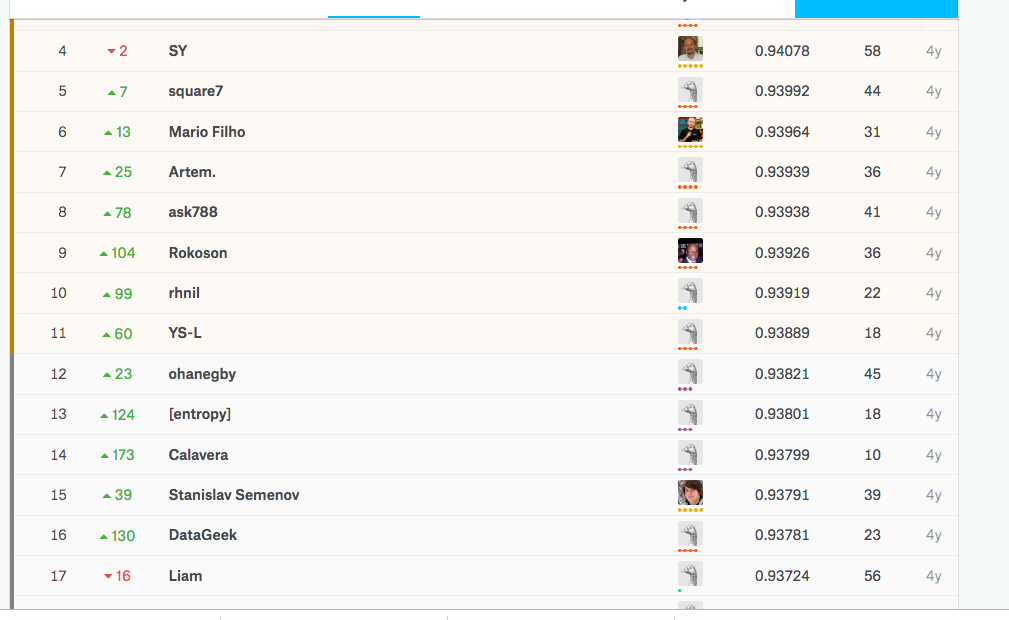

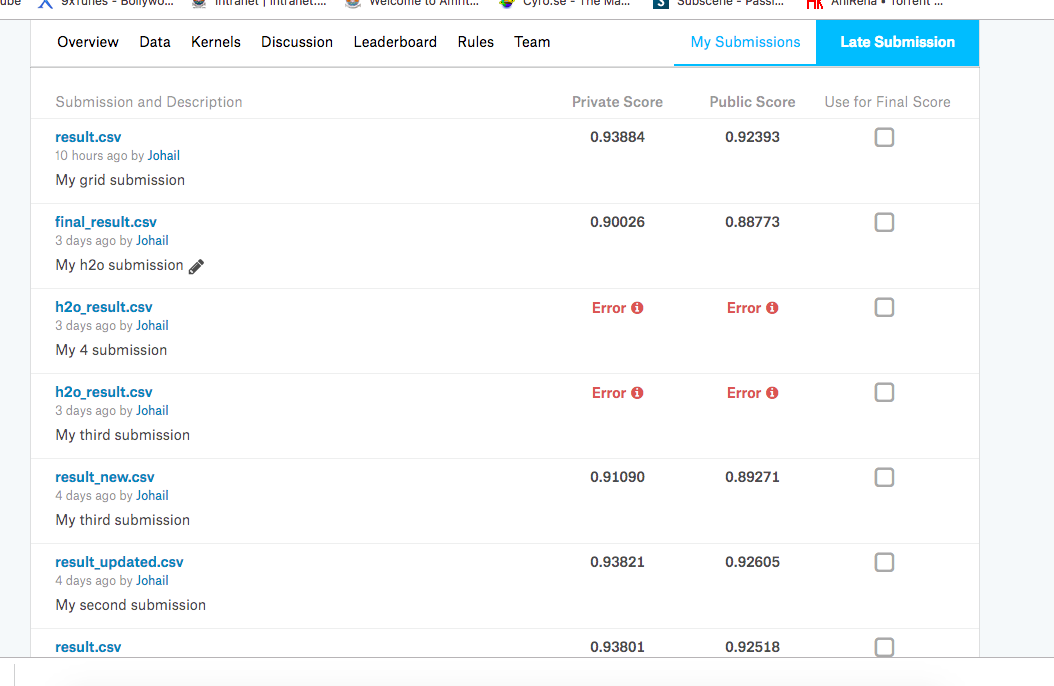